# Size to capture dynamic and parameters

A intense effort is done to make all computation reproducible. To reach this goal, numerical stability and serialization are key concepts. We present here a simple procedure to assess such stability through serialization.

## Solve a problem

Let's solve a classical problem like a calibration curve:

In [2]:
import numpy as np
from scifit.solvers import linear, scientific, specials

In [3]:
solver = linear.ParabolicFitSolver()

In [4]:
indices = [
    slice(-5, 5),
    slice(-2, 2),
    slice(0, 2),
    slice(2, 4),
    slice(0, 4)
]

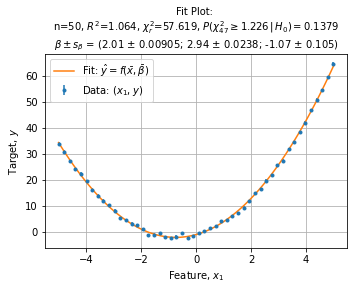

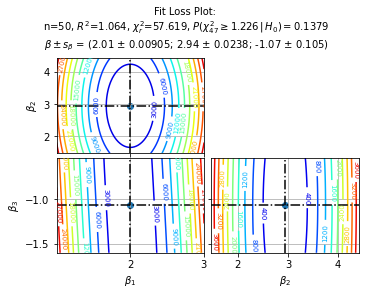

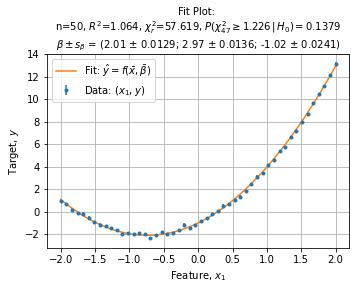

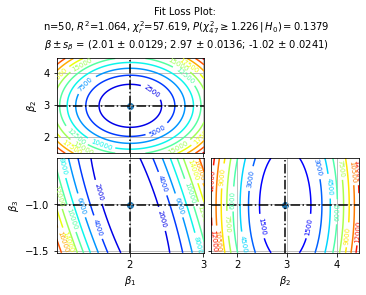

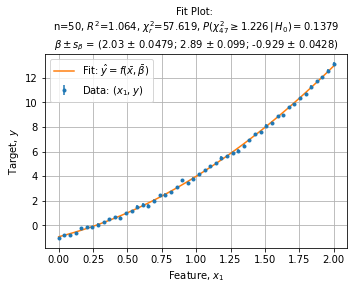

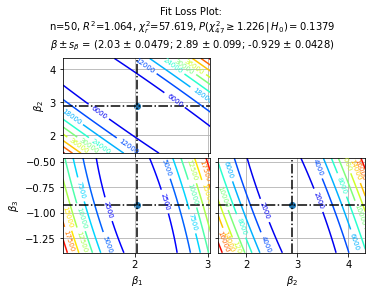

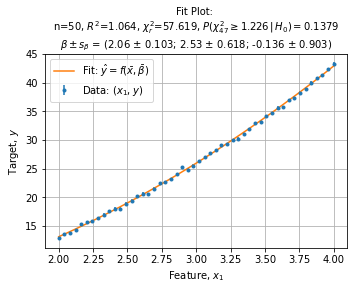

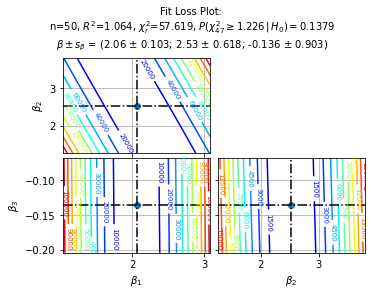

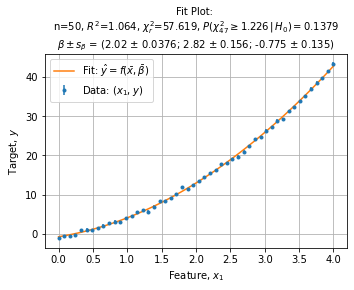

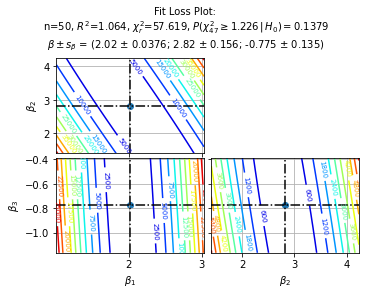

In [5]:
for index in indices:
    data = solver.synthetic_dataset(
        sigma=0.015, xmin=index.start, xmax=index.stop,
        dimension=1, resolution=50,
        parameters=[2., 3., -1.], scale_mode="auto",
        seed=12345
    )
    solver = linear.ParabolicFitSolver()
    #data = solver.load(data) #.set_index("x0").loc[index, :].reset_index())
    sol = solver.fit(data)
    axe = solver.plot_fit()
    axe = solver.plot_loss()